In [1]:
# importing dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# import openweather API key
from Config import weather_api_key

# after installing "pip install citypy", then this module would work. 
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# creating an empty list for holding  Random lat_lngs and cities
Random_lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, then zip (putting them in pair, lat first then long)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
Random_lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (using the citypy module)
for lat_lng in Random_lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [5]:
# creating empty lists so we can put values from the api calls
latitude = []
longitude = []
MaxTemp =[]
Humidity = []
Cloudiness = []
WindSpeed = []
Country =[]
Date =[]
CityName=[]

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# full url    full_url = url + "appid=" + weather_api_key + "&q=" + cities[0] + "&units=imperial"
# Build query URL, 
counter = 0
for x in cities:
    full_url = url + "appid=" + weather_api_key + "&q=" + x + "&units=imperial"
    response = requests.get(full_url).json()
    
    try:
                longitude.append(response["coord"]["lon"])
                latitude.append(response["coord"]["lat"])
                MaxTemp.append(response["main"]["temp_max"])
                Humidity.append(response["main"]["humidity"])
                Cloudiness.append(response["clouds"]["all"])
                WindSpeed.append(response["wind"]["speed"])
                Country.append(response["sys"]["country"])
                Date.append(response["dt"])
                CityName.append(response["name"])
                counter = counter + 1
        
                print(f"Data for {x} city successfully retrieved. Record #{counter}")
        
                time.sleep(0.7)
    except:
                print("An exception occurred")


Data for jamestown city successfully retrieved. Record #1
Data for hermanus city successfully retrieved. Record #2
Data for puerto suarez city successfully retrieved. Record #3
Data for oriximina city successfully retrieved. Record #4
Data for salalah city successfully retrieved. Record #5
Data for atuona city successfully retrieved. Record #6
An exception occurred
Data for ushuaia city successfully retrieved. Record #7
Data for vaini city successfully retrieved. Record #8
An exception occurred
Data for yellowknife city successfully retrieved. Record #9
Data for urubicha city successfully retrieved. Record #10
Data for porto novo city successfully retrieved. Record #11
Data for mount gambier city successfully retrieved. Record #12
Data for nikolskoye city successfully retrieved. Record #13
Data for cidreira city successfully retrieved. Record #14
An exception occurred
Data for dikson city successfully retrieved. Record #15
Data for hofn city successfully retrieved. Record #16
Data for 

Data for pevek city successfully retrieved. Record #137
Data for charters towers city successfully retrieved. Record #138
Data for gusau city successfully retrieved. Record #139
Data for bintulu city successfully retrieved. Record #140
Data for hithadhoo city successfully retrieved. Record #141
Data for hami city successfully retrieved. Record #142
An exception occurred
Data for hortobagy city successfully retrieved. Record #143
Data for chuzhou city successfully retrieved. Record #144
An exception occurred
Data for praia da vitoria city successfully retrieved. Record #145
Data for amla city successfully retrieved. Record #146
Data for hambantota city successfully retrieved. Record #147
An exception occurred
Data for waingapu city successfully retrieved. Record #148
Data for rawson city successfully retrieved. Record #149
Data for olafsvik city successfully retrieved. Record #150
Data for bursa city successfully retrieved. Record #151
Data for macusani city successfully retrieved. Reco

Data for qasigiannguit city successfully retrieved. Record #272
Data for tuy hoa city successfully retrieved. Record #273
Data for oranjestad city successfully retrieved. Record #274
Data for tazovskiy city successfully retrieved. Record #275
Data for nishihara city successfully retrieved. Record #276
Data for ahipara city successfully retrieved. Record #277
Data for uruzgan city successfully retrieved. Record #278
Data for sabha city successfully retrieved. Record #279
Data for gigmoto city successfully retrieved. Record #280
Data for mbini city successfully retrieved. Record #281
Data for puerto escondido city successfully retrieved. Record #282
Data for college city successfully retrieved. Record #283
Data for alghero city successfully retrieved. Record #284
Data for malaya purga city successfully retrieved. Record #285
Data for sibu city successfully retrieved. Record #286
Data for harbour breton city successfully retrieved. Record #287
Data for aquiraz city successfully retrieved.

Data for allanridge city successfully retrieved. Record #408
Data for tuatapere city successfully retrieved. Record #409
Data for lorengau city successfully retrieved. Record #410
Data for koslan city successfully retrieved. Record #411
Data for garden city city successfully retrieved. Record #412
Data for carutapera city successfully retrieved. Record #413
Data for dongsheng city successfully retrieved. Record #414
An exception occurred
Data for klaksvik city successfully retrieved. Record #415
Data for sandur city successfully retrieved. Record #416
Data for anshun city successfully retrieved. Record #417
Data for ostrovnoy city successfully retrieved. Record #418
Data for lisala city successfully retrieved. Record #419
Data for moyale city successfully retrieved. Record #420
Data for flinders city successfully retrieved. Record #421
Data for champasak city successfully retrieved. Record #422
Data for ajaccio city successfully retrieved. Record #423
Data for pendleton city successful

An exception occurred
Data for pingliang city successfully retrieved. Record #544
Data for bayji city successfully retrieved. Record #545
Data for sharhorod city successfully retrieved. Record #546
Data for kurilsk city successfully retrieved. Record #547
Data for nevyansk city successfully retrieved. Record #548
Data for badou city successfully retrieved. Record #549
Data for north charleston city successfully retrieved. Record #550
Data for mount isa city successfully retrieved. Record #551
Data for srandakan city successfully retrieved. Record #552
Data for padang city successfully retrieved. Record #553
Data for conde city successfully retrieved. Record #554
Data for buchanan city successfully retrieved. Record #555
Data for price city successfully retrieved. Record #556
Data for dalbandin city successfully retrieved. Record #557
Data for naze city successfully retrieved. Record #558
Data for mosquera city successfully retrieved. Record #559
Data for genhe city successfully retriev

In [7]:
# putting the lists into a dataframe
City_Weather_DF = pd.DataFrame({"City":CityName,
                               "Latitude":latitude,
                                "Longitude":longitude,
                                "Max Temp":MaxTemp,
                               "Humidity":Humidity,
                               "Cloudiness":Cloudiness,
                               "Wind Speed": WindSpeed,
                               "Country":Country,
                               "Date":Date             
                                })

In [8]:
# exporting the dataframe into a csv file. The reason is that we do NOT need to run the API with the random list
# of cities again. 

City_Weather_DF.to_csv("../Resources/CityWeather.csv")

In [9]:
# load the csv file. The new df will have a new name.
path = "../Resources/CityWeather.csv"
Weather_DF = pd.read_csv(path)

In [10]:
# dropping the first column "unnamed"
Weather_DF.drop(["Unnamed: 0"], axis = 1, inplace = True)
#dropping any null value, inplace is TRUE.
Weather_DF.dropna(how='any', inplace = True)

#checking the max humidity. if there are more than 100 humidity, remove the cities.
# in this case, there are no cities with humidity more than 100.
Weather_DF.loc[Weather_DF["Humidity"]>100]

# IF, there are any humidity that's more than 100, then we can use the following:
# Weather_DF = Weather_DF.loc[Weather_DF["Humidity"]<=100]

#now we can re-save the csv.
Weather_DF.to_csv("../Resources/CityWeather.csv")

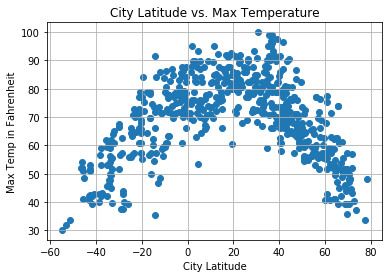

After analyzing the City Latitude vs. Max Temperature plot, as the latitude decreases, the maximum temperature also deceases.
As the latitude increases, the maximum temperature decreases as well.
In conclusion, as cities move away from the equator line, the maximum temperature decreases in relations.


In [11]:
# scatter plot time. 
# Max Temp VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Max Temp"])
plt.ylabel("Max Temp in Fahrenheit")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.savefig("../Resources/TempVsLat.png")
plt.show()

print("After analyzing the City Latitude vs. Max Temperature plot, as the latitude decreases, the maximum temperature also deceases.")
print("As the latitude increases, the maximum temperature decreases as well.")
print("In conclusion, as cities move away from the equator line, the maximum temperature decreases in relations.")


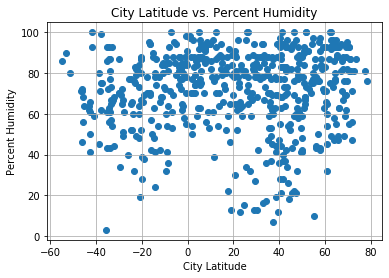

After analyzing the City Latitude vs. Percent Humidity plot, There is no noticable difference in percent humidity based on the latitude.


In [12]:
# Percent Humidity VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Humidity"])
plt.ylabel("Percent Humidity")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Percent Humidity")
plt.grid()
plt.savefig("../Resources/HumidityVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Percent Humidity plot, There is no noticable difference in percent humidity based on the latitude.")


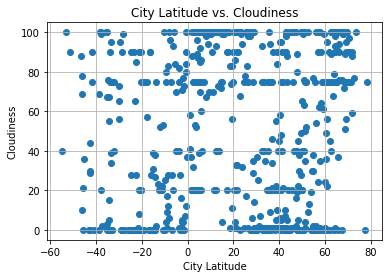

After analyzing the City Latitude vs. Cloudiness plot, There is no noticable difference in cloudiness based on the latitude.


In [13]:
# Cloudiness VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Cloudiness"])
plt.ylabel("Cloudiness")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.savefig("../Resources/CloudVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Cloudiness plot, There is no noticable difference in cloudiness based on the latitude.")


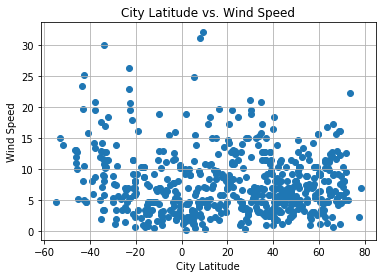

After analyzing the City Latitude vs. Wind Speed plot, There is no noticable difference in Wind Speed based on the latitude.


In [14]:
# Wind Speed VS Latitude
plt.scatter(Weather_DF["Latitude"],Weather_DF["Wind Speed"])
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.savefig("../Resources/WindVsLat.png")
plt.show()
print("After analyzing the City Latitude vs. Wind Speed plot, There is no noticable difference in Wind Speed based on the latitude.")


In [15]:
# we have to run linear regression, but we gotta separate the northern and southern hemisphere. 
north_hemi = Weather_DF.loc[Weather_DF["Latitude"]>=0]
south_hemi = Weather_DF.loc[Weather_DF["Latitude"]<0]

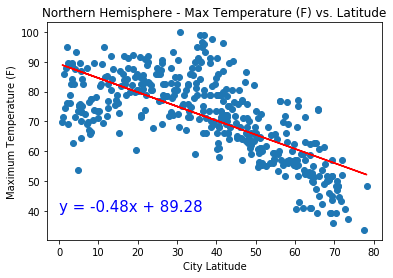

The r-squared value is 0.47821318759959897
The closer to the equator, the max temperature gets higher. As we move away north from the equator, the graph shows a decrease in max temp


In [16]:
# now that we have them divided, we can run the linear regression. 
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = north_hemi["Latitude"]
y_values = north_hemi["Max Temp"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,40), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature (F) vs. Latitude")
plt.savefig("../Resources/North_TempVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("The closer to the equator, the max temperature gets higher. As we move away north from the equator, the graph shows a decrease in max temp")



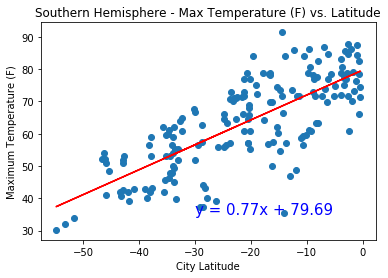

The r-squared value is 0.5730260348703957
Max temp goes higher as cities get closer to the equator. As cities moves south of the equator, the max temp decreases as well.


In [17]:
# now that we have them divided, we can run the linear regression. 
# Southern Hemisphere - Temperature (F) vs. Latitude

x_values = south_hemi["Latitude"]
y_values = south_hemi["Max Temp"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-30,35), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature (F) vs. Latitude")
plt.savefig("../Resources/South_TempVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("Max temp goes higher as cities get closer to the equator. As cities moves south of the equator, the max temp decreases as well.")


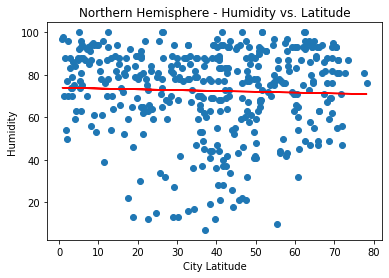

The r-squared value is 0.0013912941897848584
This analysis shows that there is no correlation between humidity and latitude in the northern hemisphere


In [18]:
# now that we have them divided, we can run the linear regression. 
# Northern Hemisphere - Humidity vs. Latitude

x_values = north_hemi["Latitude"]
y_values = north_hemi["Humidity"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.savefig("../Resources/North_HumidityVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between humidity and latitude in the northern hemisphere")


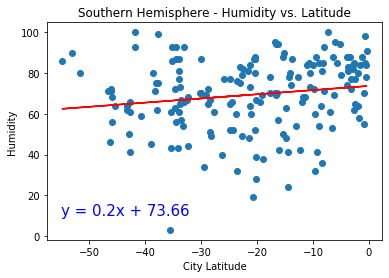

The r-squared value is 0.025674722399696114
This analysis shows that there is no correlation between humidity and latitude in the southern hemisphere


In [19]:
# now that we have them divided, we can run the linear regression. 
# Southern Hemisphere - Humidity vs. Latitude

x_values = south_hemi["Latitude"]
y_values = south_hemi["Humidity"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-55,10), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.savefig("../Resources/South_HumidityVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between humidity and latitude in the southern hemisphere")


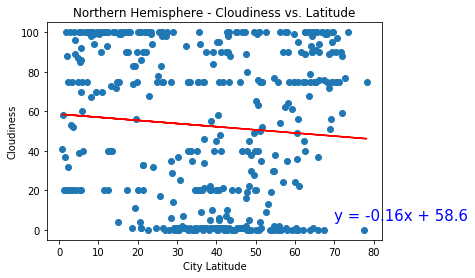

The r-squared value is 0.006674359999531428
This analysis shows that there is no correlation between cloudiness and latitude in the northern hemisphere


In [20]:
# now that we have them divided, we can run the linear regression. 
# Northern Hemisphere - Cloudiness vs. Latitude

x_values = north_hemi["Latitude"]
y_values = north_hemi["Cloudiness"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(70,5), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("../Resources/North_CloudinessVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between cloudiness and latitude in the northern hemisphere")


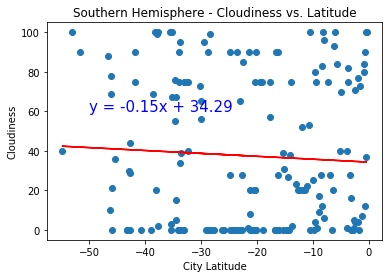

The r-squared value is 0.002990264997087596
This analysis shows that there is no correlation between cloudiness and latitude in the southern hemisphere


In [21]:
# now that we have them divided, we can run the linear regression. 
# Southern Hemisphere - Cloudiness vs. Latitude

x_values = south_hemi["Latitude"]
y_values = south_hemi["Cloudiness"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,60), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.savefig("../Resources/South_CloudinessVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between cloudiness and latitude in the southern hemisphere")


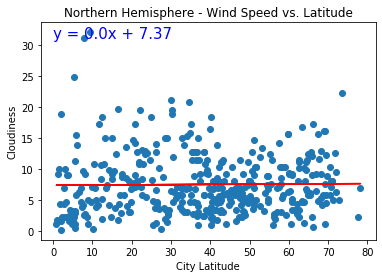

The r-squared value is 0.0001878500966932514
This analysis shows that there is no correlation between wind speed and latitude in the northern hemisphere


In [22]:
# now that we have them divided, we can run the linear regression. 
# Northern Hemisphere - Wind Speed vs. Latitude

x_values = north_hemi["Latitude"]
y_values = north_hemi["Wind Speed"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(0,31), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("../Resources/North_WindVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between wind speed and latitude in the northern hemisphere")


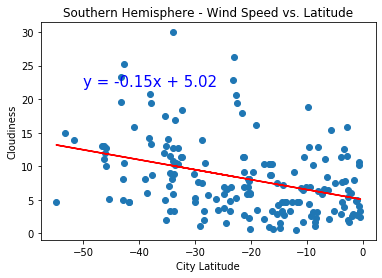

The r-squared value is 0.13685505096936376
This analysis shows that there is no correlation between wind speed and latitude in the southern hemisphere


In [23]:
# now that we have them divided, we can run the linear regression. 
# Southern Hemisphere - Wind Speed vs. Latitude

x_values = south_hemi["Latitude"]
y_values = south_hemi["Wind Speed"]
#use linregress to get slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,22), fontsize= 15, color = "blue")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.savefig("../Resources/South_WindVsLat.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
print("This analysis shows that there is no correlation between wind speed and latitude in the southern hemisphere")
